In [109]:
import xml.etree.ElementTree as ET
import string
import os  
import re
import pandas as pd

In [110]:
train_data_1 = pd.read_csv("merged_final_1.csv")
train_data = train_data_1.iloc[1:] #remove the first row because it appears as data but is acually the title only 
train_data = train_data.sample(frac=1).reset_index(drop=True) #shufffle the dataset
train_data.drop(['Unnamed: 0'], axis=1) 

#train_data_1 = train_data_1.iloc[1:] #remove the first row because it appears as data but is acually the title only 
#train_data = train_data_1.sample(frac=1).reset_index(drop=True)  #shufffle the dataset

,ArticleId,Text,Category
0,C:\Users\eless\hackathon\ML_other_1\PMC7286589,the introduction of antiretroviral therapy ar...,False
1,C:\Users\eless\hackathon\ML_other_1\PMC7122807,in a context of high rates of hiv prevalence ...,False
2,C:\Users\eless\hackathon\ML_covid_1\PMC7461076,surgery must go on,True
3,C:\Users\eless\hackathon\ML_covid_1\PMC7454637,in december 2019 a striking appearance of new...,True
4,C:\Users\eless\hackathon\ML_covid_1\PMC7411421,today clinicians may diagnose hundreds of peop...,True
5,C:\Users\eless\hackathon\ML_covid_1\PMC7436617,this article is linked to tian et al and tian ...,True
6,C:\Users\eless\hackathon\ML_covid_1\PMC7240244,here carmeliet and colleagues discuss the rol...,True
7,C:\Users\eless\hackathon\ML_covid_1\PMC7402393,covid 19 pandemia is affecting countries world...,True
8,C:\Users\eless\hackathon\ML_other_1\PMC7311653,the interaction of human immunodeficiency viru...,False
9,C:\Users\eless\hackathon\ML_other_1\PMC7262509,gene expression in hiv 1 is regulated by the p...,False


In [111]:
train_data.head() #visualizing the data table

,Unnamed: 0,ArticleId,Text,Category
0,447,C:\Users\eless\hackathon\ML_other_1\PMC7286589,the introduction of antiretroviral therapy ar...,False
1,336,C:\Users\eless\hackathon\ML_other_1\PMC7122807,in a context of high rates of hiv prevalence ...,False
2,239,C:\Users\eless\hackathon\ML_covid_1\PMC7461076,surgery must go on,True
3,220,C:\Users\eless\hackathon\ML_covid_1\PMC7454637,in december 2019 a striking appearance of new...,True
4,150,C:\Users\eless\hackathon\ML_covid_1\PMC7411421,today clinicians may diagnose hundreds of peop...,True


In [112]:
train_data['category_id'] = train_data['Category'].factorize()[0] # factorizing the output into zero and one

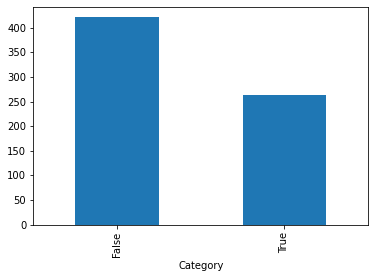

In [113]:
train_data.groupby('Category').category_id.count().plot.bar(ylim=0)

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer # term frequency & inverse document frequency (finding important words within text)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
features = tfidf.fit_transform(train_data.Text).toarray()
labels = train_data.category_id

In [115]:
category_to_id = {'true':0, 'false':1}
id_to_category = {0: 'true', 1: 'fasle'}

In [116]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2
import numpy as np

N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'false':
  . Most correlated unigrams:
       . hiv
       . 19
       . covid
  . Most correlated bigrams:
       . acute respiratory
       . sars cov
       . covid 19
# 'true':
  . Most correlated unigrams:
       . hiv
       . 19
       . covid
  . Most correlated bigrams:
       . acute respiratory
       . sars cov
       . covid 19


In [117]:
##dimension reduction 
from sklearn.manifold import TSNE #low dimensionality plot

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 1)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 

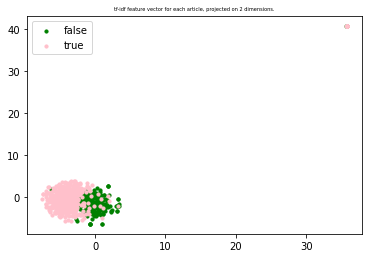

In [118]:
import matplotlib.pyplot as plt

colors = ['pink', 'green']

# Find points belonging to each category and plot them
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=5))
plt.legend()

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score


models = [
    
    RandomForestClassifier(n_estimators=500, max_depth=4, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier(n_neighbors=3)
]

In [120]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

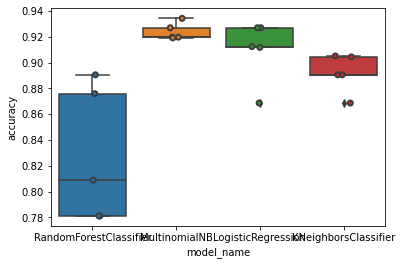

In [121]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=5, jitter=True, edgecolor="gray", linewidth=2)

In [122]:
cv_df.groupby('model_name').accuracy.mean()

model_name
KNeighborsClassifier      0.891831
LogisticRegression        0.909360
MultinomialNB             0.923970
RandomForestClassifier    0.827458
Name: accuracy, dtype: float64

In [123]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.781022
1,RandomForestClassifier,1,0.781022
2,RandomForestClassifier,2,0.890511
3,RandomForestClassifier,3,0.875912
4,RandomForestClassifier,4,0.808824
5,MultinomialNB,0,0.919708
6,MultinomialNB,1,0.927007
7,MultinomialNB,2,0.934307
8,MultinomialNB,3,0.919708
9,MultinomialNB,4,0.919118


In [124]:
from sklearn.model_selection import train_test_split

model = RandomForestClassifier()

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, train_data.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [125]:
category_id_df = train_data[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

Text(0.5, 15.0, 'Predicted')

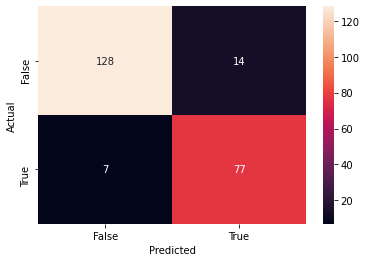

In [126]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#run chi squared

In [127]:
from IPython.display import display

for predicted in category_id_df.category_id:
   for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(train_data.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['Text'])
      print('')

'fasle' predicted as 'true' : 7 examples.


37     this article is protected by copyright  all ri...
661    this article is protected by copyright  all ri...
332    this article is protected by copyright  all ri...
17     the connection between coronavirus infection a...
140    this article is protected by copyright  all ri...
535    this article is protected by copyright  all ri...
222    this article is protected by copyright  all ri...
Name: Text, dtype: object


'true' predicted as 'fasle' : 14 examples.


301    remdesivir is a nucleotide prodrug that is cur...
144    little is known about the clinical outcomes of...
452    given the magnitude of the global covid 19 pan...
204                 hepatotoxicity is historically the 3
679    mirjam kretzschmar and marianne van der sande ...
465       histoplasmosis is an endemic mycosis caused by
480                               the proposed impact of
214    as of july 2020  approximately 6 months into t...
506    global tuberculosis  tb  control is threatened...
413    unser motto versammelt fachbeitr ge zu komorbi...
654    covid 19 disease has spread globally and was d...
443    this cross sectional study investigates whethe...
571    a potential drug drug interaction exists betwe...
651    biochemistry  structural biology  protein stru...
Name: Text, dtype: object

In [128]:
model2 = RandomForestClassifier()
model2.fit(features, labels)

RandomForestClassifier()

In [129]:
from IPython.display import display

for predicted in category_id_df.category_id:
   for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(train_data.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['Text'])
      print('')

'fasle' predicted as 'true' : 7 examples.


37     this article is protected by copyright  all ri...
661    this article is protected by copyright  all ri...
332    this article is protected by copyright  all ri...
17     the connection between coronavirus infection a...
140    this article is protected by copyright  all ri...
535    this article is protected by copyright  all ri...
222    this article is protected by copyright  all ri...
Name: Text, dtype: object


'true' predicted as 'fasle' : 14 examples.


301    remdesivir is a nucleotide prodrug that is cur...
144    little is known about the clinical outcomes of...
452    given the magnitude of the global covid 19 pan...
204                 hepatotoxicity is historically the 3
679    mirjam kretzschmar and marianne van der sande ...
465       histoplasmosis is an endemic mycosis caused by
480                               the proposed impact of
214    as of july 2020  approximately 6 months into t...
506    global tuberculosis  tb  control is threatened...
413    unser motto versammelt fachbeitr ge zu komorbi...
654    covid 19 disease has spread globally and was d...
443    this cross sectional study investigates whethe...
571    a potential drug drug interaction exists betwe...
651    biochemistry  structural biology  protein stru...
Name: Text, dtype: object

In [130]:
model2 = RandomForestClassifier()
model2.fit(features, labels)

RandomForestClassifier()

In [150]:
text_submissions = pd.read_csv("one_.csv" )
submissions = pd.read_csv("results.csv")

In [151]:
submissions.head()

,ArticleId,Category
0,PMC7103696,True
1,PMC7225630,True
2,PMC7241447,True
3,PMC7241459,True
4,PMC7241546,True


In [152]:
text_submissions.head()

,ArticleId,Text
0,7103696,three leading infectious disease experts in ch...
1,7225630,this month s under the lens discusses how stru...
2,7241447,covid 19 the worst pandemic in 100 years has...
3,7241459,the current pandemic coronavirus disease 2019 ...
4,7241546,the global spread of covid 19 has put increase...


In [158]:
test_features = tfidf.transform(text_submissions.Text.tolist())
prediction=model.predict(test_features)
id_to_category = {0: 'true', 1: 'false'}
for i in range(len(prediction)):
    submissions.iloc[i,1] = id_to_category[prediction[i]]
    

In [159]:
# Convert submission dataframe to csv 
# you could use any filename. We choose submission here
submissions.to_csv('submission.csv', index=False)